In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target


# Important hyperparameters 

- Kernel: shape of seperators (linear vs. rbf vs. poly)
- gamma: defines influence of a single training example
- C: defines tradeoff between smooth decision boundry and classyfing points correctly

Kernel:  
RBF is the default setting and is used to create a non-linear hyperplane.The same goes for poly. Linear is used to create a linear hyperplance. How to choose the right Kernel you ask?? Cross Validate!

Gamma:  
a higher gamma value allows close data points to greatly influence the decision boundry. The opposite is true for low gamma values. 

C:   
A large C value leads to a higher accuracy.


In [31]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc = svm.SVC(kernel='rbf', C=15,gamma=10,probability = False).fit(X, y)
predictions = svc.predict(X)

In [32]:
from sklearn.metrics import confusion_matrix 

confuse = confusion_matrix(predictions,y)

In [33]:
confuse

array([[50,  0,  0],
       [ 0, 40,  9],
       [ 0, 10, 41]])

In [14]:
#create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

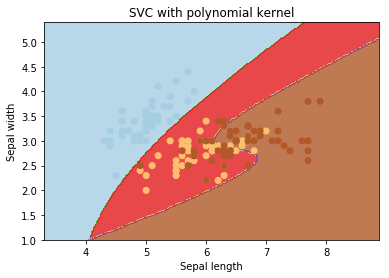

In [15]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel')
plt.show()

AttributeError: predict_proba is not available when  probability=False

# Pros and Cons
### Pros
- It works really well with clear margin of separation
- It is effective with large number of features.
- It is effective in cases where number of dimensions is greater than the number of samples.
- Memory Efficient

## Cons
- It doesn’t perform well, when we have large data set because the required training time is higher
- It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
- SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

# Tips on Usage
- The linear kernel is best for a large dataset (N>1000) since  it is more likely that the data is linearly separable in high dimensional space. 
- When using the rbf kernel, cross validate for gamma and C